#Import and read in dataset

In [33]:
#import pandas
import pandas as pd

# load dataset
pima = pd.read_csv("diabetes.csv")

Selecting Feature

In [34]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
#split dataset in features and target variable

feature_cols = ['Pregnancies','Glucose','BloodPressure' ,'SkinThickness', 'Insulin' ,'BMI', 	'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable


Splitting Data

In [36]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split # Import train_test_split function
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

Model Development and Prediction

In [37]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=200)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

Model Evaluation using Confusion Matrix

In [38]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 26,  36]])

In [39]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

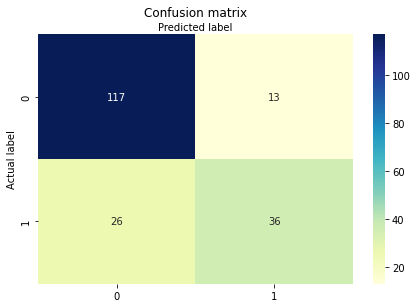

In [40]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Evaluation Metrics

In [41]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.796875
Precision: 0.7346938775510204
Recall: 0.5806451612903226


ROC Curve

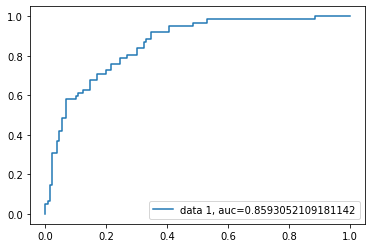

In [42]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Sklearn vs Our code.

In [44]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings( "ignore" )
  
# to compare our model's accuracy with sklearn model
from sklearn.linear_model import LogisticRegression
# Logistic Regression
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # no_of_training_examples, no_of_features        
        self.m, self.n = X.shape        
        # weight initialization        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y
  
  
# Driver code
  
def main() :
      
    # Importing dataset    
    df = pd.read_csv( "diabetes.csv" )
    X = df.iloc[:,:-1].values
    Y = df.iloc[:,-1:].values
      
    # Splitting dataset into train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
      X, Y, test_size = 0.25, random_state = 0 )
      
    # Model training    
    model = LogitRegression( learning_rate = 0.01, iterations = 1000 )
      
    model.fit( X_train, Y_train )    
    model1 = LogisticRegression()    
    model1.fit( X_train, Y_train)
      
    # Prediction on test set
    Y_pred = model.predict( X_test )    
    Y_pred1 = model1.predict( X_test )
      
    # measure performance    
    correctly_classified = 0    
    correctly_classified1 = 0
      
    # counter    
    count = 0    
    for count in range( np.size( Y_pred ) ) :  
        
        if Y_test[count] == Y_pred[count] :            
            correctly_classified = correctly_classified + 1
          
        if Y_test[count] == Y_pred1[count] :            
            correctly_classified1 = correctly_classified1 + 1
              
        count = count + 1
          
    print( "Accuracy on test set by our model       :  ", ( 
      correctly_classified / count ) * 100 )
    print( "Accuracy on test set by sklearn model   :  ", ( 
      correctly_classified1 / count ) * 100 )
  
  
if __name__ == "__main__" :     
    main()

Accuracy on test set by our model       :   63.541666666666664
Accuracy on test set by sklearn model   :   79.16666666666666
